In [782]:
from sklearn.datasets import make_circles
import torch
import numpy as np
from matplotlib import pyplot as plt

In [783]:
from torchvision import datasets, transforms
from torch import nn

In [829]:
data = make_circles (5000)

In [785]:
print(np.shape(data[0]), np.shape(data[1]))

(5000, 2) (5000,)


In [830]:
data0 = torch.from_numpy(data[0])
labels = torch.from_numpy(data[1])

In [831]:
dataset = torch.utils.data.TensorDataset(data0, labels)

In [832]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [833]:
len(dataset)

5000

In [834]:
training_data= [dataset[i] for i in range(4000)]
test_data = [dataset[i] for i in range(4000, 5000)]

In [835]:
len(training_data)

4000

In [836]:
dataset[100]

(tensor([0.7937, 0.1003], dtype=torch.float64), tensor(1))

In [837]:
len(data0[0])

2

In [794]:
len(data0[:,0])

5000

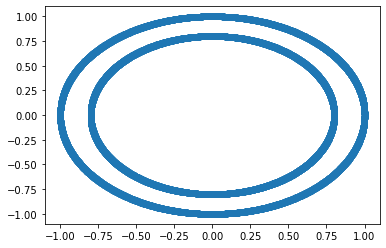

In [795]:
plt.scatter(data0[:,0], data0[:,1])

In [796]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def d_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [936]:
def identity(x):
  return x

def d_identity(x):
  return torch.ones(x.size())

In [937]:
class Neural_Network(nn.Module):
    def __init__(self, lr=1.0, activation = sigmoid, d_activation = d_sigmoid):
        super(Neural_Network, self).__init__()
        self.inputSize = 2
        self.hiddenSize = 10
        self.outputSize = 1
        self.lr = lr

        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize).float()
        self.W2 = torch.randn(self.hiddenSize, self.outputSize).float()
        self.b1 = torch.randn(1, self.hiddenSize).float()
        self.b2 = torch.randn(1, self.outputSize).float()
        self.activation = activation
        self.d_activation = d_activation


    def forward(self, X):
        self.z1 = torch.matmul(X.float(), self.W1)+self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = torch.matmul(self.a1, self.W2) +self.b2
        self.a2 = self.activation(self.z2)
        return self.a2

    def backpropagate(self,X, a2, y_target):
        # commencer par:
        #print(self.a1.size())
        y_target = y_target.unsqueeze(1)
        #print("ytarget = ", y_target.size())    
        #print(type(y_target))
        #print("a2 = ", a2.size())
        #print("z2 =", self.z2.size())
        dE_da2 = (a2 - y_target) #
        #print("dE_da2=", dE_da2.size())
        dE_dz2 = dE_da2 * self.d_activation(self.z2) #
        #print("dE_dz2=", dE_dz2.size())
        dE_db2 = torch.sum(dE_dz2) #
        dE_da1 = dE_dz2 @ self.W2.T # C'est un vecteur
        #print("dE_da1= ", dE_da1.size())
        dE_dW2 = dE_dz2.T @ self.a1 
        #print("dE_dW2 = ", dE_dW2.size())
        #d_act_vector1 = [d_activation (self.z1) for i in range(len(self.z1))]
        #dE_dz1 = dE_da1* d_act_vector1
        dE_dz1 = dE_da1* self.d_activation(self.z1)
        #print("dE_dz1=", dE_dz1.size())
        dE_db1 = torch.sum(dE_dz1)
        dE_dW1 = (dE_dz1.T @ X).T
        #print("dE_dW1", dE_dW1.size())
        #print("dE_dW2", dE_dW2.size())
        #print("dE_dz1= ", dE_dz1.size())
        #print("a2 = " , a2.size())
        lr = self.lr
        self.W2 -= lr*dE_dW2.T
        #print("W2 = ",self.W2.size())
        #print("W1 = ", self.W1.size())
        self.W1 -= lr*dE_dW1
        self.b1 -= lr*dE_db1
        #print("b1 = ", self.b1.size())
        self.b2 -= lr*dE_db2
        #print("b2 = ", self.b2.size())

In [1072]:
class Neural_Network(nn.Module):
    def __init__(self, lr=1.0, activation = sigmoid, d_activation = d_sigmoid):
        super(Neural_Network, self).__init__()
        self.inputSize = 2
        self.hiddenSize = 10
        self.outputSize = 1
        self.lr = lr

        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize).float()
        self.W2 = torch.randn(self.hiddenSize, self.outputSize).float()
        self.b1 = torch.randn(1, self.hiddenSize).float()
        self.b2 = torch.randn(1, self.outputSize).float()
        self.activation = activation
        self.d_activation = d_activation

    def forward(self, X):
        self.z1 = torch.matmul(X.float(), self.W1)+self.b1
        #print(self.z1)
        self.a1 = self.activation(self.z1)
        self.z2 = torch.matmul(self.a1, self.W2) +self.b2
        self.a2 = self.activation(self.z2)
        return self.a2

    def backpropagate(self,X, a2, y_target):
        # commencer par:
        #print(self.a1.size())
        y_target = y_target.unsqueeze(1)
        dE_da2 = (a2 - y_target) #
        #print('a')
        #print("z2", self.z2.size())
        dE_dz2 = dE_da2 * self.d_activation(self.z2) #
        dE_db2 = torch.sum(dE_dz2) #
        dE_da1 = dE_dz2 @ self.W2.T 
        #print("dE/dz2", dE_dz2.size())
        #print("W2", self.W2.size())
        dE_dW2 = dE_dz2.T @ self.a1 
        dE_dz1 = dE_da1* self.d_activation(self.z1)
        dE_db1 = torch.sum(dE_dz1)
        dE_dW1 = (dE_dz1.T @ X).T
        lr = self.lr
        self.W2 -= lr*dE_dW2.T
        self.W1 -= lr*dE_dW1
        self.b1 -= lr*dE_db1
        self.b2 -= lr*dE_db2

In [1074]:
net = Neural_Network()


In [801]:
from tqdm.notebook import tqdm
from time import sleep
from tqdm import trange, tnrange

In [1079]:
def train(dataset, model,batch_size = 3, epoch = 10):
    for i in tqdm(range(epoch)):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for X, y in dataload:
            X = X.float()
            y = y.float()
            yv_pred = model.forward(X).float()
            #print("b")
            #print(model.z2.size())
            #print("yv_pred = ", yv_pred.size())
            model.backpropagate(X, yv_pred, y)   
            #loss = nn.MSELoss(y, yv_pred)
            #model.zero_grad()
            #loss.backward()
            
        
        
            
        





In [1075]:
train(training_data, net, epoch = 20, batch_size = 16)

  0%|          | 0/20 [00:00<?, ?it/s]

In [1063]:
dataload = torch.utils.data.DataLoader(training_data, batch_size = 1)
for x,y in dataload:
    print(x.size())
    y_p = net.forward((x.float()))
    print("b2", net.b2.size())
    print("z2", net.z2.size())
    print("W2", net.W2.size())
    print("a1", net.a1.size())
    print(y_p)
    #print(net_bn.bn1.track_running_stats)
    break
            

torch.Size([1, 2])
b2 torch.Size([1, 1])
z2 torch.Size([1, 1])
W2 torch.Size([10, 1])
a1 torch.Size([1, 10])
tensor([[0.5061]])


In [877]:
def success_rate(model,test_data):
    S = 0
    n = len(test_data)

    #k = len(model(test_data[1][0]))
    """for i in range(n):
        prediction = model(test_data[i])
        print(len(prediction))
        if np.abs((float(prediction- test_data[i][1]))) < 0.5:
            S += 1"""
    dl = torch.utils.data.DataLoader(test_data, batch_size = 1)
    for x,y in dl:
        #print(model.W2.size())
        prediction = model.forward(x)
        #print(prediction.size())
        '''if torch.abs((prediction- y)) < 0.5:
            S += 1'''
        if torch.abs(prediction - y) < torch.abs(prediction - (1-y)):
            S+= 1
        
    return S/n
                        

In [1076]:
success_rate(net, test_data)

0.507

In [1080]:
net_lin = Neural_Network(activation = identity, d_activation = d_identity, lr= 0.1)

In [1056]:
dataload = torch.utils.data.DataLoader(training_data, batch_size = 1)
for x,y in dataload:
    print(x.size())
    print("y", y)
    y_p = net_lin.forward((x.float()))
    print("prediction", y_p)
    print("b1", net_lin.b1)
    print("b2", net_lin.b2.size())
    print("z2", net_lin.z2.size())
    print("W2", net_lin.W2.size())
    print("a1", net_lin.a1.size())
    print(net_lin.z2.size())
    #print(y_p)
    #print(net_bn.bn1.track_running_stats)
    break

torch.Size([1, 2])
y tensor([0])
prediction tensor([[nan]])
b1 tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])
b2 torch.Size([1, 1])
z2 torch.Size([1, 1])
W2 torch.Size([10, 1])
a1 torch.Size([1, 10])
torch.Size([1, 1])


In [1082]:
train(training_data, net_lin, epoch = 20, batch_size = 16)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
def success_rate(model,test_data):
    S = 0
    n = len(test_data)

            S += 1
    dl = torch.utils.data.DataLoader(test_data, batch_size = 1)
    for x,y in dl:
        #print(model.W2.size())
        prediction = model.forward(x)
        #print(prediction.size())
        '''if torch.abs((prediction- y)) < 0.5:
            S += 1'''
        if torch.abs(prediction - y) < torch.abs(prediction - (1-y)):
            S+= 1
        
    return S/n

In [1083]:
success_rate(net_lin, training_data)

0.0

# Partie 2 : Initialisation

In [1084]:
tr =  transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda x: torch.flatten(x))])
training_data_FM = datasets.FashionMNIST(".",download=True,train=True, transform = tr)
test_data_FM = datasets.FashionMNIST(".",download=True,train=False, transform = tr)

In [1085]:
import torch.nn.functional as F 

class MyNetwork(nn.Module): # a class inheriting from nn.Module

    def __init__(self): 
        super(MyNetwork, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layer1 = nn.Linear(784, 128)
        #self.act1 = nn.reLu()
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.act2 = self.act1
        self.layer3 = nn.Linear(64, 10)
        self.act3 = nn.LogSoftmax(dim=-1)
    def forward(self,x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        #result = F.relu(self.layer1(x))
        result = self.act1(self.layer1(x))
        result = self.act2((self.layer2(result)))
        result = self.act3(self.layer3(result))
        return result
    

    

network = MyNetwork()

#network.apply(init_weights)



In [1086]:
loss_fn = torch.nn.NLLLoss()
"""def train2(dataset, model,batch_size = 3, epoch = 10, lr= 0.01):
    #model.apply(init_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    for i in range(epoch):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for X, y in tqdm(dataload):
            X = X.float()
            y = y.float()
            yv_pred = net.forward(X).float()
            #print("yv_pred = ", yv_pred.size())
            loss = loss_fn(yv_pred.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()"""
            
            
def trainer2(dataset,model,loss_fn,epoch=10,batch_size=1,rate=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr= rate)
    for i in range(epoch):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        #for batch, (x,y) in enumerate(dataload):
        for (x,y) in tqdm(dataload):
            # Compute prediction error
            y_pred = model(x)
            loss = loss_fn(y_pred.float(), y)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return model
           

In [105]:
dtload = torch.utils.data.DataLoader(training_data_FM, batch_size = 5)

In [106]:
Z = 0
T = 0
for x,y in dtload:
    Z = x
    T = y
    break
logi = network(x)
    

In [108]:
print(loss_fn(logi, T)<0,5)

tensor(False) 5


In [757]:
#plot_loss_accuracy(training_data_FM, test_data_FM, network, epoch = 3, batch_size = 16)

In [1087]:
trainer2(training_data_FM, network,loss_fn, batch_size = 16, epoch =3 )

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

MyNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (act3): LogSoftmax(dim=-1)
)

In [1088]:
def success_rate2(model,test_data):
    S = 0
    n = len(test_data)
    #k = len(model(test_data[1][0]))
    for i in range(n):
        prediction_vector = model(test_data[i][0])
        prediction = np.argmax(list(prediction_vector))
        if np.abs((float(prediction- test_data[i][1])))<0.5:
            S += 1
    return S/n
print(success_rate2(network, test_data_FM))

0.8449


In [1102]:
network_null = MyNetwork()

In [1099]:
def null(W):
    Z = torch.from_numpy(np.zeros((len(W), len(W[0]))))
    return Z
    
def init_weights(m):
    if type(m) == nn.Linear:
        null(m.weight)

In [1103]:
network_null.apply(init_weights)

MyNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (act3): LogSoftmax(dim=-1)
)

In [1105]:
trainer2(training_data_FM, network_null,loss_fn, batch_size = 16, epoch =3 )

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

MyNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (act3): LogSoftmax(dim=-1)
)

In [1106]:
success_rate2(network_null, test_data_FM)

0.8416

In [1109]:
network_Xavier = MyNetwork()

In [1110]:
def Xavier(W):
    Z = torch.from_numpy(np.random.randn(len(W), len(W[0]))/np.sqrt(len(W)))
    return Z
def init_weights(m):
    if type(m) == nn.Linear:
        Xavier(m.weight)

In [1111]:
network_Xavier.apply(init_weights)

MyNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (act3): LogSoftmax(dim=-1)
)

In [1112]:
trainer2(training_data_FM, network_Xavier,loss_fn, batch_size = 16, epoch =3 )

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

MyNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (act3): LogSoftmax(dim=-1)
)

In [1113]:
print(success_rate2(network_Xavier, test_data_FM))

0.8441


In [1120]:
#Not working
'''def plot_loss_accuracy_FM(training_data, test_data, model, lr = 0.01, epoch = 100, batch_size = 10):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn = torch.nn.NLLLoss()
    tr_losses = []
    val_losses = []
    tr_corrects = []
    val_corrects = []
    for i in tqdm(range(epoch)):
        tr_loss= 0
        val_loss= 0
        tr_correct = 0
        val_correct = 0
        train_dataload = torch.utils.data.DataLoader(training_data, batch_size = batch_size)
        for x,y in train_dataload:
            y_p = model.forward(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            tr_loss += loss
            _,preds=torch.max(y_p,1)  
            tr_correct+=torch.sum(preds==y.data)  
        test_dataload = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
        with torch.no_grad():
            for x,y in test_dataload:
                y_p = model(x.float())
                #prediction_vector = model(test_data[i][0])
                prediction = np.argmax(list(y_p))
                y = y.unsqueeze(1)
                loss = loss_fn(y_p.float(), y.float())
                val_loss += loss
                _,preds=torch.max(y_p,1)  
                val_correct+=torch.sum(preds==y.data)  
        tr_loss/= len(train_dataload) 
        val_loss/= len(test_dataload)
        tr_losses.append(tr_loss)
        val_losses.append(val_loss)
        tr_correct = tr_correct/len(train_dataload)
        val_correct = val_correct / len(test_dataload)
        tr_corrects.append(tr_correct)
        val_corrects.append(val_correct)
        
    fig, axs = plt.subplots(2)
    plt.subplots_adjust(hspace = 0.4)
    axs[0].plot(tr_losses, label = 'training loss')
    axs[0].set_title("losses")
    axs[0].plot(val_losses, label = 'validation loss')
    axs[0].legend()
    axs[1].plot(tr_corrects, label = 'training accuracy')
    axs[1].plot(val_corrects, label = 'validation accuracy')
    axs[1].set_title("Accuracy")
    axs[1].legend()
 '''


'def plot_loss_accuracy_FM(training_data, test_data, model, lr = 0.01, epoch = 100, batch_size = 10):\n    optimizer = torch.optim.Adam(model.parameters(), lr= lr)\n    loss_fn = torch.nn.NLLLoss()\n    tr_losses = []\n    val_losses = []\n    tr_corrects = []\n    val_corrects = []\n    for i in tqdm(range(epoch)):\n        tr_loss= 0\n        val_loss= 0\n        tr_correct = 0\n        val_correct = 0\n        train_dataload = torch.utils.data.DataLoader(training_data, batch_size = batch_size)\n        for x,y in train_dataload:\n            y_p = model.forward(x.float())\n            y = y.unsqueeze(1)\n            loss = loss_fn(y_p.float(), y.float())\n            optimizer.zero_grad()\n            loss.backward()\n            optimizer.step()\n            tr_loss += loss\n            _,preds=torch.max(y_p,1)  \n            tr_correct+=torch.sum(preds==y.data)  \n        test_dataload = torch.utils.data.DataLoader(test_data, batch_size = batch_size)\n        with torch.no_grad():

In [1121]:
#plot_loss_accuracy(training_data_FM, test_data_FM, network, epoch = 3, batch_size = 16)

## Méthodes de régularisation

In [1122]:
datas = make_circles(100, noise = 0.1)
datas0 = torch.from_numpy(datas[0])
datas1 = torch.from_numpy(datas[1])
dataset2 = torch.utils.data.TensorDataset(datas0, datas1)


In [1123]:
training_d = [dataset2[i] for i in range(50)]
test_d = [dataset2[i] for i in range(50, 100)]

In [1124]:
class Net_R(nn.Module): # a class inheriting from nn.Module

    def __init__(self): 
        super(Net_R, self).__init__() # call the constructor of nn.Module
        # Defining some layers
        self.layer1 = nn.Linear(2,500)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(500,500)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(500,1)
        self.act3 = nn.Sigmoid()
    def forward(self,x): 
        #x = x.to(device)
        result = self.act1(self.layer1(x))
        result = self.act2(self.layer2(result))
        result = self.act3(self.layer3(result))
        return result
    

In [1145]:
net2 = Net_R()

In [1126]:
def trainer(dataset, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    for i in tqdm(range(epoch)):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return model


In [1143]:
trainer(training_d, net2, epoch = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

Net_R(
  (layer1): Linear(in_features=2, out_features=500, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=500, out_features=1, bias=True)
  (act3): Sigmoid()
)

In [1128]:
def success_r(model,test_data):
    S = 0
    n = len(test_data)
    dl = torch.utils.data.DataLoader(test_data, batch_size = 1)
    for x,y in dl:
        #print(model.W2.size())
        prediction = model(x.float())
        #print(prediction.size())
        if torch.abs((prediction- y)) < 0.5:
            S += 1    
    return S/n

In [1148]:
success_r(net2, test_d)

0.98

In [1130]:
from matplotlib import pyplot as plt

In [1139]:
def train_plot_loss_accuracy(training_data, test_data, model, lr = 0.01, epoch = 100, batch_size = 10):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    tr_losses = []
    val_losses = []
    tr_corrects = []
    val_corrects = []
    for i in tqdm(range(epoch)):
        tr_loss= 0
        val_loss= 0
        tr_correct = 0
        val_correct = 0
        train_dataload = torch.utils.data.DataLoader(training_data, batch_size = batch_size)
        model.train()
        for x,y in train_dataload:
            y_p = model.forward(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            tr_loss += loss
            _,preds=torch.max(y_p,1)  
            tr_correct+=torch.sum(preds==y.data)  
        test_dataload = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
        model.eval()
        with torch.no_grad():
            for x,y in test_dataload:
                y_p = model(x.float())
                y = y.unsqueeze(1)
                loss = loss_fn(y_p.float(), y.float())
                val_loss += loss
                _,preds=torch.max(y_p,1)  
                val_correct+=torch.sum(preds==y.data)  
        tr_loss/= len(train_dataload) 
        val_loss/= len(test_dataload)
        tr_losses.append(tr_loss)
        val_losses.append(val_loss)
        tr_correct = tr_correct/len(train_dataload)
        val_correct = val_correct / len(test_dataload)
        tr_corrects.append(tr_correct)
        val_corrects.append(val_correct)
        
    fig, axs = plt.subplots(2)
    plt.subplots_adjust(hspace = 0.4)
    axs[0].plot(tr_losses, label = 'training loss')
    axs[0].set_title("losses")
    axs[0].plot(val_losses, label = 'validation loss')
    axs[0].legend()
    axs[1].plot(tr_corrects, label = 'training accuracy')
    axs[1].plot(val_corrects, label = 'validation accuracy')
    axs[1].set_title("Accuracy")
    axs[1].legend()

  0%|          | 0/50 [00:00<?, ?it/s]

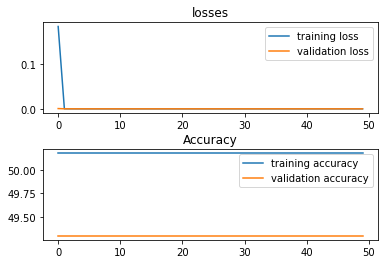

In [1147]:
train_plot_loss_accuracy(training_data, test_data, net2, epoch = 50, batch_size = 10)

In [1131]:

def plot_precision(dataset, test, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    precision = []
    for i in tqdm(range(epoch)):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        precision.append(success_r(model, test))
    plt.figure(figsize = (6,6))
    plt.plot(precision)
    
    

In [1154]:
net2 = Net_R()

  0%|          | 0/400 [00:00<?, ?it/s]

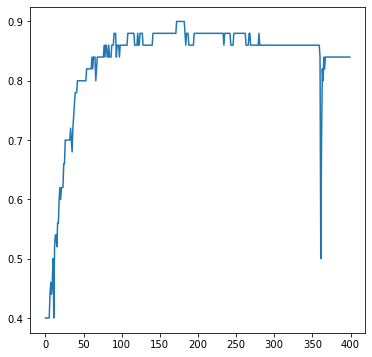

In [1155]:
plot_precision(training_d, test_d, net2, epoch = 400)

In [1156]:
net2 = Net_R()

In [1157]:
def plot_cost(dataset, test, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    cost = []
    for i in tqdm(range(epoch)):
        Loss_epoch = 0
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            Loss_epoch += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        cost.append(Loss_epoch)
    plt.figure(figsize = (6,6))
    plt.plot(cost)

  0%|          | 0/400 [00:00<?, ?it/s]

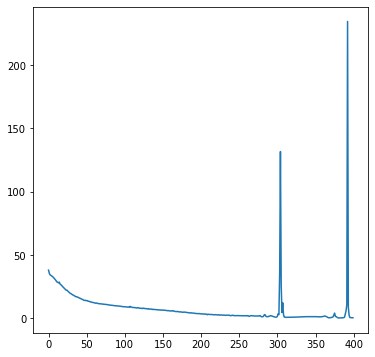

In [1158]:
plot_cost(training_d, test_d, net2, epoch = 400)

In [1159]:
success_r(net2, test_d)

0.84

In [1160]:
class Net_Dropout(nn.Module): # a class inheriting from nn.Module

    def __init__(self): 
        super(Net_Dropout, self).__init__() # call the constructor of nn.Module
        # Defining some layers
        self.layer1 = nn.Linear(2,500)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(500,500)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(500,1)
        self.act3 = nn.Sigmoid()
        self.drop = nn.Dropout(p=0.5)
    def forward(self,x): 
        #x = x.to(device)
        result = self.act1(self.drop(self.layer1(x)))
        result = self.act2(self.drop(self.layer2(result)))
        result = self.act3((self.layer3(result)))
        return result
    #def predict(self,x):
        
    

In [1161]:
net_dropout = Net_Dropout()

In [1162]:
success_r(net_dropout, test_d)

0.5

In [1163]:
def plot_cost(dataset, test, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    cost = []
    for i in tqdm(range(epoch)):
        Loss_epoch = 0
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            Loss_epoch += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        cost.append(Loss_epoch)
    plt.figure(figsize = (6,6))
    plt.plot(cost)

  0%|          | 0/100 [00:00<?, ?it/s]

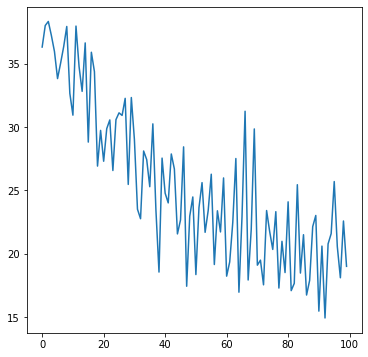

In [1164]:
plot_cost(training_d, test_d, net_dropout, epoch = 100)

In [1165]:
success_r(net_dropout, test_d)

0.74

In [1166]:
net_dropout = Net_Dropout()

  0%|          | 0/100 [00:00<?, ?it/s]

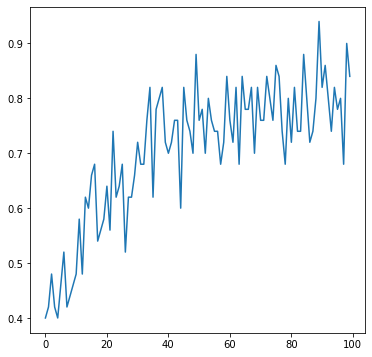

In [1167]:
plot_precision(training_d, test_d, net_dropout, epoch = 100)

## Batch Nomralization

In [1168]:
class Net_Batch_norm(nn.Module): # a class inheriting from nn.Module

    def __init__(self): 
        super(Net_Batch_norm, self).__init__() # call the constructor of nn.Module
        # Defining some layers
        self.layer1 = nn.Linear(2,500)
        self.bn1 = nn.BatchNorm1d(500)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(500,500)
        self.bn2 = nn.BatchNorm1d(500)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(500,1)
        self.bn3 = nn.BatchNorm1d(1)
        self.act3 = nn.Sigmoid()
    def forward(self,x): 
        #x = x.to(device)
        '''
        try:
            result = self.act1(self.bn1(self.layer1(x)))
            result = self.act2(self.bn2(self.layer2(result)))
            result = self.act3(self.layer3(result))
        except:
            result = self.act1(self.layer1(x))
            result = self.act2(self.layer2(result))
            result = self.act3(self.layer3(result))
        '''
        if x.size()[0] != 1:
            result = self.act1(self.bn1(self.layer1(x)))
            result = self.act2(self.bn2(self.layer2(result)))
            result = self.act3(self.bn3(self.layer3(result)))
            return result
        else:
            result = self.act1(self.layer1(x))
            result = self.act2(self.layer2(result))
            result = self.act3(self.layer3(result))
        return result
    
    def predict(self,x):
        result = self.act1(self.layer1(x))
        result = self.act2(self.layer2(result))
        result = self.act3(self.layer3(result))
        return result
            
    

In [1172]:
"""
model_bn = nn.Sequential(nn.Linear(2,500),
                       nn.BatchNorm1d(500), nn.ReLU(),nn.Linear(500,500),
                         nn.BatchNorm1d(500),nn.ReLU(),nn.Linear(500,1),nn.BatchNorm1d(1),nn.Sigmoid() )
                        """

'\nmodel_bn = nn.Sequential(nn.Linear(2,500),\n                       nn.BatchNorm1d(500), nn.ReLU(),nn.Linear(500,500),\n                         nn.BatchNorm1d(500),nn.ReLU(),nn.Linear(500,1),nn.BatchNorm1d(1),nn.Sigmoid() )\n                        '

In [1173]:
net_bn = Net_Batch_norm()

In [1175]:
def plot_cost_bn(dataset, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    cost = []
    for i in tqdm(range(epoch)):
        Loss_epoch = 0
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            Loss_epoch += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        cost.append(Loss_epoch)
    plt.figure(figsize = (6,6))
    plt.plot(cost)

  0%|          | 0/100 [00:00<?, ?it/s]

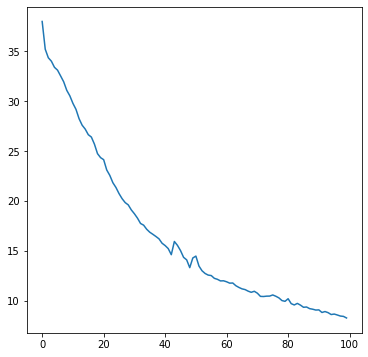

In [1176]:
plot_cost_bn(training_d, net_bn, epoch = 100)

In [694]:
dataload = torch.utils.data.DataLoader(training_d, batch_size = 2)
for x,y in dataload:
    print(x.size())
    print(y)
    y_p = net_bn.forward((x.float()))
    print(y_p)
    print(net_bn.bn1.track_running_stats)
    break
            

torch.Size([2, 2])
tensor([1, 0])
tensor([[0.2690],
        [0.7310]], grad_fn=<SigmoidBackward>)
True


In [637]:
def train_bn(dataset, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    for i in tqdm(range(epoch)):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model.forward(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return model

In [1196]:
train_bn(training_d, net_bn, epoch = 200, batch_size = 10 )

  0%|          | 0/200 [00:00<?, ?it/s]

Net_Batch_norm(
  (layer1): Linear(in_features=2, out_features=500, bias=True)
  (bn1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (bn2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (layer3): Linear(in_features=500, out_features=1, bias=True)
  (bn3): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): Sigmoid()
)

In [738]:
def plot_loss_accuracy(training_data, test_data, model, lr = 0.01, epoch = 100, batch_size = 10):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    tr_losses = []
    val_losses = []
    tr_corrects = []
    val_corrects = []
    for i in tqdm(range(epoch)):
        tr_loss= 0
        val_loss= 0
        tr_correct = 0
        val_correct = 0
        train_dataload = torch.utils.data.DataLoader(training_data, batch_size = batch_size)
        for x,y in train_dataload:
            y_p = model.forward(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            tr_loss += loss
            _,preds=torch.max(y_p,1)  
            tr_correct+=torch.sum(preds==y.data)  
        test_dataload = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
        with torch.no_grad():
            for x,y in test_dataload:
                y_p = model(x.float())
                y = y.unsqueeze(1)
                loss = loss_fn(y_p.float(), y.float())
                val_loss += loss
                _,preds=torch.max(y_p,1)  
                val_correct+=torch.sum(preds==y.data)  
        tr_loss/= len(train_dataload) 
        val_loss/= len(test_dataload)
        tr_losses.append(tr_loss)
        val_losses.append(val_loss)
        tr_correct = tr_correct/len(train_dataload)
        val_correct = val_correct / len(test_dataload)
        tr_corrects.append(tr_correct)
        val_corrects.append(val_correct)
        
    fig, axs = plt.subplots(2)
    plt.subplots_adjust(hspace = 0.4)
    axs[0].plot(tr_losses, label = 'training loss')
    axs[0].set_title("losses")
    axs[0].plot(val_losses, label = 'validation loss')
    axs[0].legend()
    axs[1].plot(tr_corrects, label = 'training accuracy')
    axs[1].plot(val_corrects, label = 'validation accuracy')
    axs[1].set_title("Accuracy")
    axs[1].legend()

        
        
                
            

In [1195]:
net_bn = Net_Batch_norm()

  0%|          | 0/100 [00:00<?, ?it/s]

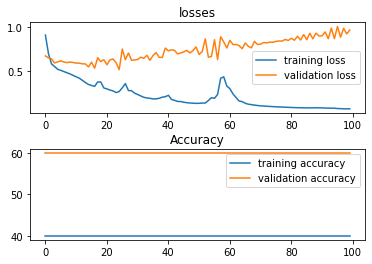

In [1178]:
plot_loss_accuracy(training_d, test_d, net_bn, epoch = 100, batch_size = 10)

  0%|          | 0/100 [00:00<?, ?it/s]

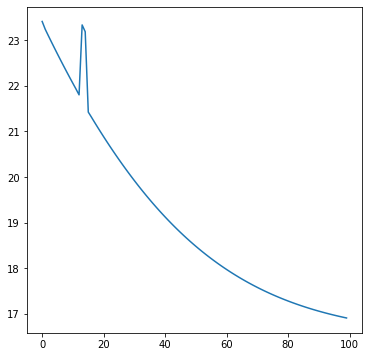

In [1180]:
plot_cost(training_d, test_d, model_bn, epoch = 100, batch_size = 2)

In [1193]:
def success_r_b(model,test_data):
    S = 0
    n = len(test_data)
    dl = torch.utils.data.DataLoader(test_data, batch_size = 1)
    #model.eval()
    #with torch.no_grad():
    model.eval()
    for x,y in dl:
        #print(model.W2.size())
        prediction = model(x.float())
        #model.bn1.track_running_stats = False
        #model.bn2.track_running_stats = False
        #model.bn3.track_running_stats = False
        #print(prediction.size())
        '''if torch.abs((prediction- y)) < 0.5:
            S += 1 '''
        if torch.abs(prediction - y) < torch.abs(prediction - (1-y)):
            S+= 1
    model.train()
    return S/n

In [1197]:
success_r_b(net_bn, test_d)

0.6

In [685]:
def plot_precision_bn(dataset, test, model, lr = 1e-3, epoch = 1000, batch_size = 1):
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    loss_fn  = nn.BCELoss() 
    precision = []
    for i in tqdm(range(epoch)):
        dataload = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
        for x,y in dataload:
            y_p = model(x.float())
            y = y.unsqueeze(1)
            loss = loss_fn(y_p.float(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        precision.append(success_r_b(model, test))
    plt.figure(figsize = (6,6))
    plt.plot(precision)
    
    